In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [8]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [9]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [12]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [15]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5', 'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [17]:
y = np.ravel(y)

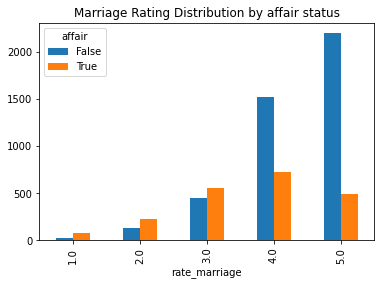

In [23]:
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title("Marriage Rating Distribution by affair status")
plt.xlabel=("Marriage Rating")
plt.ylabel=("Frequency")

In [25]:
model = LogisticRegression()
model = model.fit(X,y)

#accuracy obtained from training dataset
model.score(X,y)

C:\Users\Hanu\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7255733584668552

In [26]:
# what percentage had affairs?
y.mean()

0.3224945020420987

In [27]:
# Only 32% of the women had affairs, which means that the model can obtain 68% accuracy by always predicting “no”. So we’re doing better than the null error rate, but not much.

# Let’s examine the coefficients to see what we learn.

X.columns, np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'),
 array([[ 1.40145923],
        [ 0.09413074],
        [ 0.3713048 ],
        [ 0.12211304],
        [ 0.73428393],
        [ 0.28089221],
        [ 0.28915682],
        [ 0.41944414],
        [ 0.24627223],
        [ 0.27406147],
        [ 0.28771128],
        [-0.6845293 ],
        [-0.05578739],
        [ 0.10799375],
        [-0.00914242],
        [-0.3728921 ],
        [ 0.00715386]]))

In [29]:
# evaluate the model by splitting the data-set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

model2 = LogisticRegression()
model2 = model2.fit(X_train, y_train)

C:\Users\Hanu\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
predicted = model2.predict(X_test)
print(y_test)
print(predicted)

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]


In [32]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.78636004, 0.21363996],
       [0.418693  , 0.581307  ],
       [0.82897338, 0.17102662],
       ...,
       [0.68876555, 0.31123445],
       [0.92249765, 0.07750235],
       [0.87786493, 0.12213507]])

In [34]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.7178010471204188
0.7441433110298837


<AxesSubplot:>

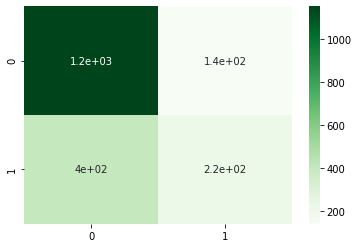

In [38]:
conf_matrix = metrics.confusion_matrix(y_test,predicted)
sns.heatmap(conf_matrix, annot=True, cmap='Greens')

In [39]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81      1291
         1.0       0.61      0.36      0.45       619

    accuracy                           0.72      1910
   macro avg       0.68      0.62      0.63      1910
weighted avg       0.70      0.72      0.69      1910



In [40]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y ,scoring='accuracy', cv=10)
scores, scores.mean()

C:\Users\Hanu\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hanu\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

(array([0.72213501, 0.69858713, 0.73469388, 0.70800628, 0.71585557,
        0.72684458, 0.72955975, 0.70597484, 0.74842767, 0.75314465]),
 0.7243229367218585)

In [ ]:
# Looks good. It’s still performing at 73% accuracy.